['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N'] ['Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y']
features : 
 ['Fasting Blood Sugar>1,26g/L (2 different times)', 'associated symptoms (thirsty/poliuria)', 'weightloss', 'Blood sugar >2g/L', 'tired', 'blurred vision']
features res: 
 ['il est recommandé de contrôler en urgence votre glycémie à jeun (min 8h). ', " Il faut consulter d'urgence votre médecin traitant ou un diabétologue"]
[0, 1, 1, 1, 1, 1] [1, 0, 0, 0, 1, 0] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'il est recommandé de contrôler en urgence votre glycémie à jeun (min 8h).')

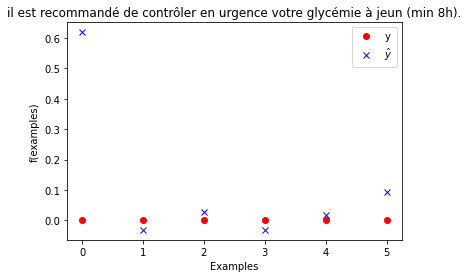

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

df = pd.read_excel (r'patient_data.xlsx', sheet_name='Sheet6')
raw_datas = df.values.tolist()
print(raw_datas[0],raw_datas[1])

features_list = list(df.to_dict().keys())[:-2] #avec -2 on exclue les résultats
features_res_list = list(df.to_dict().keys())[-2:] 
print("features : \n", features_list)
print("features res: \n", features_res_list)

X=[]
y=[]
y_element1= []
y_element2= []
for j in range(len(raw_datas)):
    X_element = []
    
    for i in range(len(raw_datas[0])):
       
        if (i<=len(raw_datas[0])-3):
            ##on est dans les features
            if (raw_datas[j][i]=='Y') :
            
                X_element.append(1)
            else :
                X_element.append(0)
        elif (i==len(raw_datas[0])-2) :
            if (raw_datas[j][i]=='Y') :
            
                y_element1.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element1.append(0)
        elif (i==len(raw_datas[0])-1) :
            if (raw_datas[j][i]=='Y') :

                y_element2.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element2.append(0)
    
    X.append(X_element)  
y.append(y_element1)  
y.append(y_element2)
print(X[0], X[1],y[0],y[1])       

X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("il est recommandé de contrôler en urgence votre glycémie à jeun (min 8h).")


[0, 0, 0, 0, 0, 0] [0.34245823 0.05971604 0.21345985 0.18184681 0.14867116 0.10520787]


Text(0.5, 1.0, "Il faut consulter d'urgence votre médecin traitant ou un diabétologue")

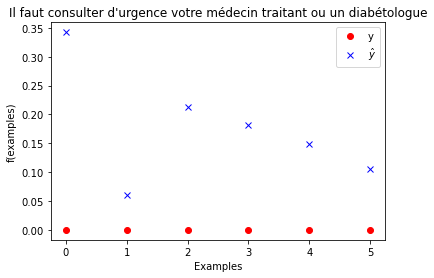

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y[1],random_state=1, test_size = 0.20)
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print(y_test, y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("Il faut consulter d'urgence votre médecin traitant ou un diabétologue")

In [67]:
##test d'une prédiction sur un nouveau X
y_predict = mlp.predict([[0, 0, 1, 0, 1, 1]])
print(y_predict)

[0.03003365]
